# TITLE : MODELS OF DENSITY FROM COMPOSITIONAL DATA MWC7+  TEMP PRESSURE USING MACHINE LEARNING ALGORITHM

OBJECTIVE : TRINING OF MODELS FOR FUTURE SELECTION FOR PREDICTION OF DENSITY USING WIDE RANGE OF COMPOSITION DATA.


ONCE DATA PRE PROCESS FINAL TRAIN TEST FILE EXPORTED TO DATASOURCE FOR MODEL PREPARATION AND VALIDATION AND ALL OTHER REQUIRED 
DATA EXPORTED TO EXPORT FILE FOR REFERENCING AND ALL.


kINDLY NOTE THAT MAJOR OBJECTIVE OF THIS FILE IS TO NOT EFFECT TRAINING OF MODEL WHICH TAKE TIME FOR HYPERPARAMETER OPTIMIZATION

THIS FILE USED FOR GRAPH PREAPRATION AS WELL AS PREPARATION OF DATA.




In [1]:
#DATA EXTRACTION, MANIPULATION, VIZULIZATION LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#STATISTICAL TOOLS LIBRARY
import scipy.stats as stat
import pylab 
from statsmodels.stats.outliers_influence import variance_inflation_factor

#DATA FETURES OPERATION LIBRARY
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler

## 2. PREPARING DATASET FOR MODELLING

                                  #### Importing data from system to python ####

In [2]:
#IMPORTANT PATH LOCATION FOR OPERATION LISTED HERE 

path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY COMPOSITION\\MODEL 1\\DATASOURCE\\"
filename = "DENSITY RAWDATA.xlsx"
sheet_name = "DATA"

export_data_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY COMPOSITION\\MODEL 1\\EXPORTED DATA\\"

figure_path = "C:\\STUDY DRIVE\\DENSITY PAPER THESIS\\DENSITY COMPOSITION\\MODEL 1\\FIGURES\\"


In [3]:
## Data stored into data variable
df = pd.read_excel(path+filename,sheet_name = sheet_name,float_format="%.6f")

                                    #### Looking into first five rows ####

In [4]:
df.head()

,Sr.No,H2S,N2,CO2,C1,C2,C3-C6,C7+,MWC7+,Temp,P,Density
0,F1,0.0,0.0037,0.0000,0.2289,0.0059,0.0636,0.6979,167.0,336.1,89.4,780.1
1,F2,0.0,0.0020,0.0021,0.5155,0.0419,0.1387,0.2998,186.0,367.2,241.4,594.3
2,F3,0.0,0.0044,0.0045,0.3505,0.0464,0.1118,0.4824,225.0,355.6,344.8,785.4
3,F4,0.0,0.0044,0.0045,0.3505,0.0464,0.1118,0.4824,225.0,355.6,206.9,772.0
4,F5,0.0,0.0044,0.0045,0.3505,0.0464,0.1118,0.4824,225.0,355.6,173.8,768.3


In [5]:
df.columns

Index(['Sr.No', 'H2S', 'N2', 'CO2', 'C1', 'C2', 'C3-C6', 'C7+', 'MWC7+',
       'Temp', 'P', 'Density'],
      dtype='object')

In [6]:
#REMOVING Sr.No COLUMNS FROM DATA 
data = df[['H2S', 'N2', 'CO2', 'C1', 'C2', 'C3-C6', 'C7+', 'MWC7+',
       'Temp', 'P', 'Density']]

In [7]:
data.shape

(261, 11)

In [8]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H2S,261.0,0.011882,0.057326,0.000000,0.0000,0.000000,0.000000,0.513700
N2,261.0,0.014105,0.040382,0.000000,0.0029,0.006500,0.012520,0.482100
CO2,261.0,0.016811,0.021164,0.000000,0.0055,0.009100,0.021600,0.165800
C1,261.0,0.418133,0.199303,0.044500,0.2556,0.375430,0.543000,0.947300
C2,261.0,0.067498,0.060983,0.000000,0.0447,0.063226,0.086000,0.468300
C3-C6,261.0,0.128706,0.079547,0.000343,0.0721,0.141710,0.204968,0.272500
C7+,261.0,0.342516,0.219004,0.000400,0.1719,0.332900,0.525250,0.774400
MWC7+,261.0,230.648210,89.241881,107.000000,166.9000,216.182551,246.367297,482.217820
Temp,261.0,370.674330,38.210129,303.200000,333.1500,375.000000,394.250000,436.700000
P,261.0,267.750791,131.515363,48.300000,165.5000,275.565613,349.890795,654.178667


In [9]:
#COPYING DATASET INTO NEW VARIABLE TO PERFORM OPERATION IN PRIVIOUS DATA IN FUTURE
new_data = data.copy()

                       #### Removing missing values and Duplicates records present ####

In [10]:
#LOOKING FOR MISSING VALUES
new_data.isnull().sum()

H2S        0
N2         0
CO2        0
C1         0
C2         0
C3-C6      0
C7+        0
MWC7+      0
Temp       0
P          0
Density    0
dtype: int64

<AxesSubplot:>

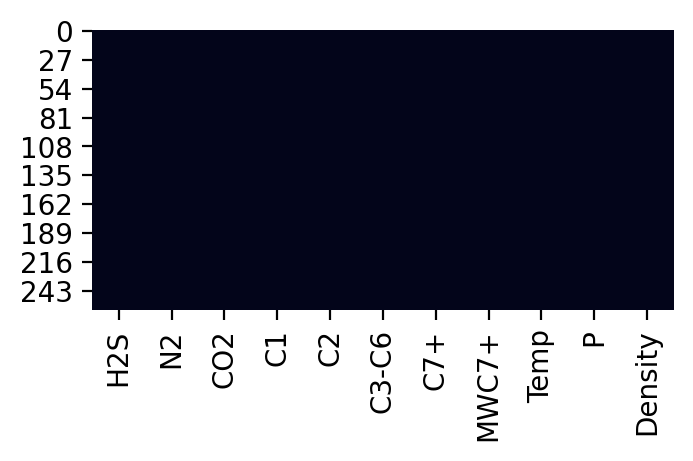

In [11]:
#Heatmap to vizualize null values

fig1 = plt.figure(figsize = (3.75,1.85),dpi=200)
sns.heatmap(new_data.isnull() , cbar = False)

In [12]:
##Removing missing values present however no missing values were present.
data_dropna = new_data.dropna()

<AxesSubplot:>

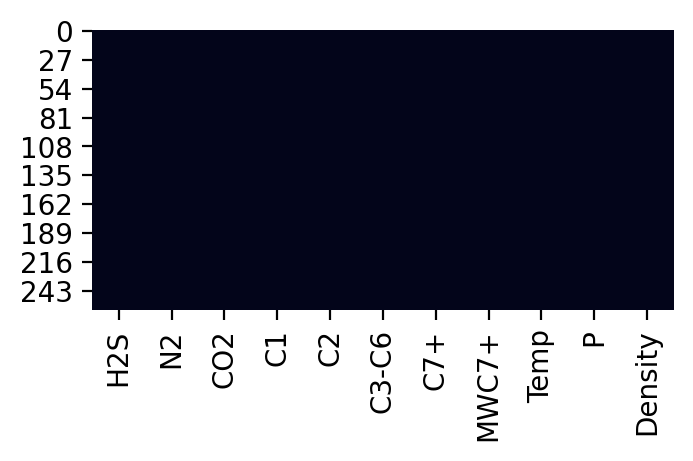

In [13]:
plt.figure(figsize = (3.75,1.85),dpi=200)
sns.heatmap(data_dropna.isnull() , cbar = False)

In [14]:
#Prepare Subplot If required


In [15]:
#cheking for duplicate values because data taken from litureature hence possibility to duplicate values
data_dropna.duplicated().sum()

0

In [16]:
#droping duplicate values 
data_dropna_duplicate = data_dropna.drop_duplicates()

In [17]:
#df.iloc[data_dropna_duplicate.index].to_excel("FINAL_PSAT_DATA_REF.xlsx")

In [18]:
##Storing data into raw_data for further calculation 
raw_data = data_dropna_duplicate.copy()

In [19]:
raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H2S,261.0,0.011882,0.057326,0.000000,0.0000,0.000000,0.000000,0.513700
N2,261.0,0.014105,0.040382,0.000000,0.0029,0.006500,0.012520,0.482100
CO2,261.0,0.016811,0.021164,0.000000,0.0055,0.009100,0.021600,0.165800
C1,261.0,0.418133,0.199303,0.044500,0.2556,0.375430,0.543000,0.947300
C2,261.0,0.067498,0.060983,0.000000,0.0447,0.063226,0.086000,0.468300
C3-C6,261.0,0.128706,0.079547,0.000343,0.0721,0.141710,0.204968,0.272500
C7+,261.0,0.342516,0.219004,0.000400,0.1719,0.332900,0.525250,0.774400
MWC7+,261.0,230.648210,89.241881,107.000000,166.9000,216.182551,246.367297,482.217820
Temp,261.0,370.674330,38.210129,303.200000,333.1500,375.000000,394.250000,436.700000
P,261.0,267.750791,131.515363,48.300000,165.5000,275.565613,349.890795,654.178667


In [20]:
#Share To excel If required



In [21]:
new_raw_data_old = raw_data.copy()

In [22]:
new_raw_data_old.columns

Index(['H2S', 'N2', 'CO2', 'C1', 'C2', 'C3-C6', 'C7+', 'MWC7+', 'Temp', 'P',
       'Density'],
      dtype='object')

<AxesSubplot:>

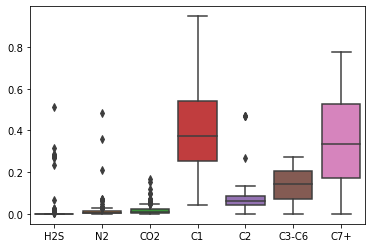

In [23]:
#Use boxplot if required for thesis or paper
#composition are related to each other because its overall values equal to 1 or 100% hence cheking outliers not required.

fig,ax = plt.subplots()
sns.boxplot(data = new_raw_data_old[['H2S', 'N2', 'CO2', 'C1', 'C2', 'C3-C6', 'C7+']], ax =ax)

<AxesSubplot:>

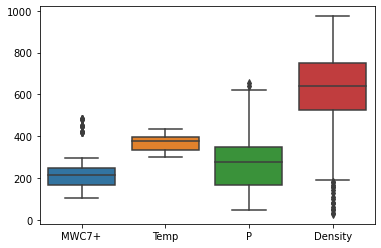

In [24]:
#Store following figure if necessory
fig2,ax = plt.subplots()
sns.boxplot(data = new_raw_data_old[['MWC7+', 'Temp', 'P',
       'Density']], ax =ax)

In [25]:
#Removing Outliers in step by step manner by looking into box plot
#First remove outliers from the MWC7+ as very few records are there.
new_raw_data_old_1 = new_raw_data_old[new_raw_data_old["MWC7+"] < 450]

C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='P'>

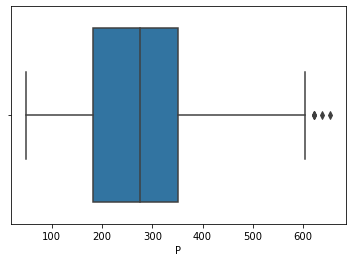

In [26]:
sns.boxplot(new_raw_data_old_1["P"])

In [27]:
new_raw_data_old_2 = new_raw_data_old_1[new_raw_data_old_1["P"] < 700]

C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Density'>

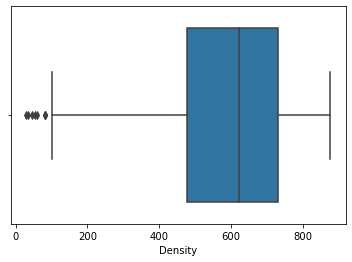

In [28]:
sns.boxplot(new_raw_data_old_2["Density"])

C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temp'>

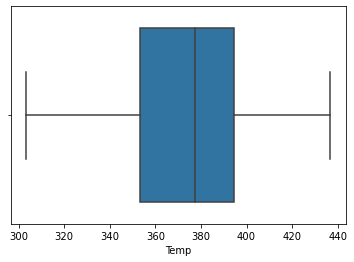

In [29]:
sns.boxplot(new_raw_data_old_2["Temp"])

C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='C1'>

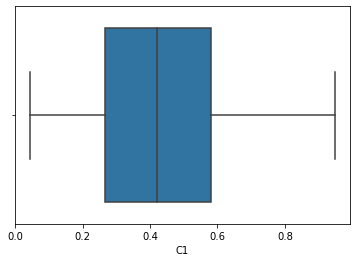

In [30]:
sns.boxplot(new_raw_data_old_2["C1"])

C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='C3-C6'>

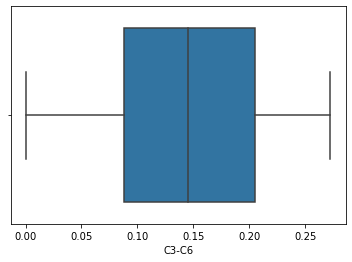

In [31]:
sns.boxplot(new_raw_data_old_2["C3-C6"])

C:\Users\CHINTAN PATEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='C7+'>

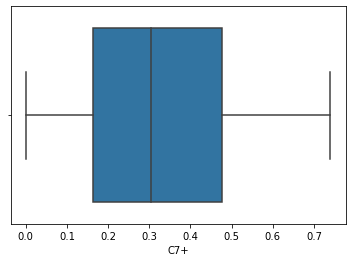

In [32]:
sns.boxplot(new_raw_data_old_2["C7+"])

In [33]:
new_raw_data = new_raw_data_old_2.copy()

In [34]:
new_raw_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
H2S,242.0,0.012815,0.059442,0.000000,0.000000,0.000000,0.000000,0.513700
N2,242.0,0.014722,0.041858,0.000000,0.003200,0.006500,0.017225,0.482100
CO2,242.0,0.017390,0.021683,0.000000,0.006075,0.009100,0.022300,0.165800
C1,242.0,0.430513,0.201306,0.044500,0.265800,0.420600,0.582250,0.947300
C2,242.0,0.072747,0.060266,0.000000,0.046575,0.065000,0.086000,0.468300
C3-C6,242.0,0.138484,0.074215,0.000343,0.088325,0.145700,0.204968,0.272500
C7+,242.0,0.312953,0.198779,0.000400,0.162400,0.304300,0.476300,0.739800
MWC7+,242.0,212.361324,62.922488,107.000000,165.000000,212.738349,233.365889,422.045065
Temp,242.0,375.266942,35.757391,303.200000,353.300000,377.550000,394.250000,436.700000
P,242.0,276.846267,130.338189,48.300000,181.100000,275.950000,351.000000,654.178667


## 3. Exploratery Data Analysis

                                    #### Computing Corelationship matrix ####

In [36]:
#paerson Corelation matrix
new_raw_data.corr()

,H2S,N2,CO2,C1,C2,C3-C6,C7+,MWC7+,Temp,P,Density
H2S,1.000000,0.186901,0.226935,0.034860,-0.097726,-0.225663,-0.284122,-0.280097,0.062837,-0.153494,-0.360094
N2,0.186901,1.000000,-0.016322,-0.100872,-0.024378,0.062330,-0.177914,-0.168690,-0.079489,-0.140353,-0.079971
CO2,0.226935,-0.016322,1.000000,0.215320,0.028604,-0.027155,-0.398076,-0.359055,0.183186,0.269021,-0.292882
C1,0.034860,-0.100872,0.215320,1.000000,-0.159222,-0.505972,-0.788269,-0.615468,0.372898,0.358886,-0.791119
C2,-0.097726,-0.024378,0.028604,-0.159222,1.000000,0.333125,-0.232390,-0.187608,0.047512,0.032434,-0.031016
C3-C6,-0.225663,0.062330,-0.027155,-0.505972,0.333125,1.000000,0.095443,-0.088177,-0.164943,-0.273491,0.369159
C7+,-0.284122,-0.177914,-0.398076,-0.788269,-0.232390,0.095443,1.000000,0.872174,-0.352446,-0.226659,0.829187
MWC7+,-0.280097,-0.168690,-0.359055,-0.615468,-0.187608,-0.088177,0.872174,1.000000,-0.140893,0.026498,0.666901
Temp,0.062837,-0.079489,0.183186,0.372898,0.047512,-0.164943,-0.352446,-0.140893,1.000000,0.414169,-0.495549
P,-0.153494,-0.140353,0.269021,0.358886,0.032434,-0.273491,-0.226659,0.026498,0.414169,1.000000,-0.126244


In [38]:
#sparerman Corelation matrix
new_raw_data.corr("spearman")

,H2S,N2,CO2,C1,C2,C3-C6,C7+,MWC7+,Temp,P,Density
H2S,1.000000,0.028306,0.472003,0.141520,-0.053163,-0.151005,-0.273004,-0.194642,0.185471,-0.042938,-0.224577
N2,0.028306,1.000000,0.127730,0.281292,0.094091,0.006565,-0.499196,-0.644051,0.315533,0.084513,-0.507638
CO2,0.472003,0.127730,1.000000,0.242310,0.132692,0.036403,-0.346123,-0.325156,0.261119,0.228981,-0.247640
C1,0.141520,0.281292,0.242310,1.000000,0.094280,-0.546168,-0.828820,-0.748091,0.364217,0.455054,-0.786866
C2,-0.053163,0.094091,0.132692,0.094280,1.000000,0.510293,-0.357713,-0.244496,0.219058,0.126500,-0.216606
C3-C6,-0.151005,0.006565,0.036403,-0.546168,0.510293,1.000000,0.240531,0.212656,-0.206025,-0.301091,0.373055
C7+,-0.273004,-0.499196,-0.346123,-0.828820,-0.357713,0.240531,1.000000,0.905283,-0.372581,-0.300523,0.878464
MWC7+,-0.194642,-0.644051,-0.325156,-0.748091,-0.244496,0.212656,0.905283,1.000000,-0.336335,-0.188197,0.831560
Temp,0.185471,0.315533,0.261119,0.364217,0.219058,-0.206025,-0.372581,-0.336335,1.000000,0.404785,-0.570141
P,-0.042938,0.084513,0.228981,0.455054,0.126500,-0.301091,-0.300523,-0.188197,0.404785,1.000000,-0.322499


In [39]:
#Share TO excel If neccesory

Text(0.5, 1.0, 'Spearman Corelation Matrix')

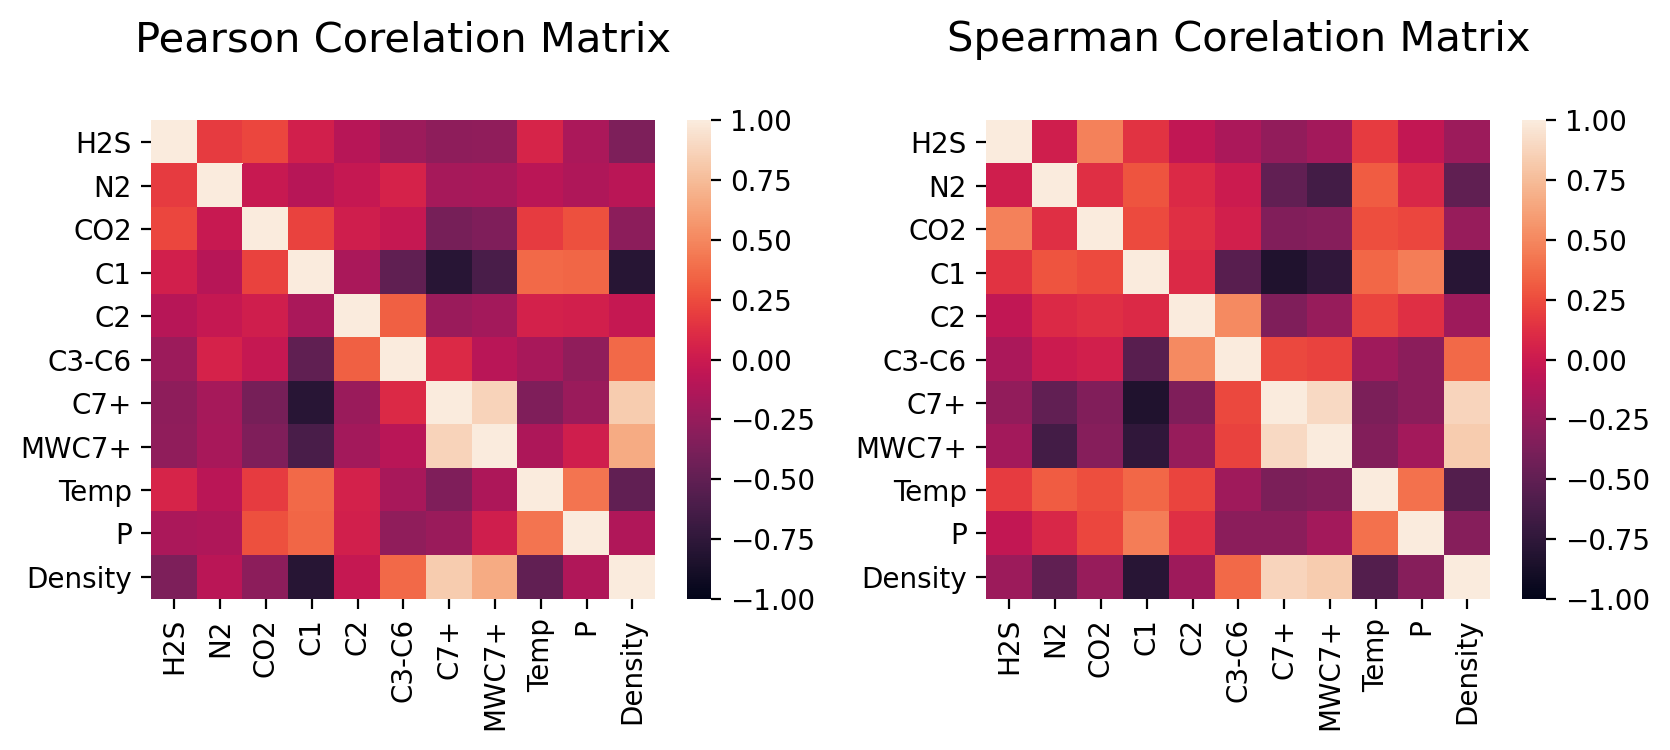

In [40]:
## heat map of corelationship matrix
fig3 = plt.figure(figsize = (8.5,3.85) , dpi = 200)
plt.subplot(1,2,1)
sns.heatmap(new_raw_data.corr(),vmax=1,vmin = -1)
plt.title("Pearson Corelation Matrix" , fontsize =15, pad = 25)
plt.subplot(1,2,2)
sns.heatmap(new_raw_data.corr("spearman"),vmax=1,vmin = -1)
plt.tight_layout()
plt.title("Spearman Corelation Matrix" , fontsize =15, pad = 25)

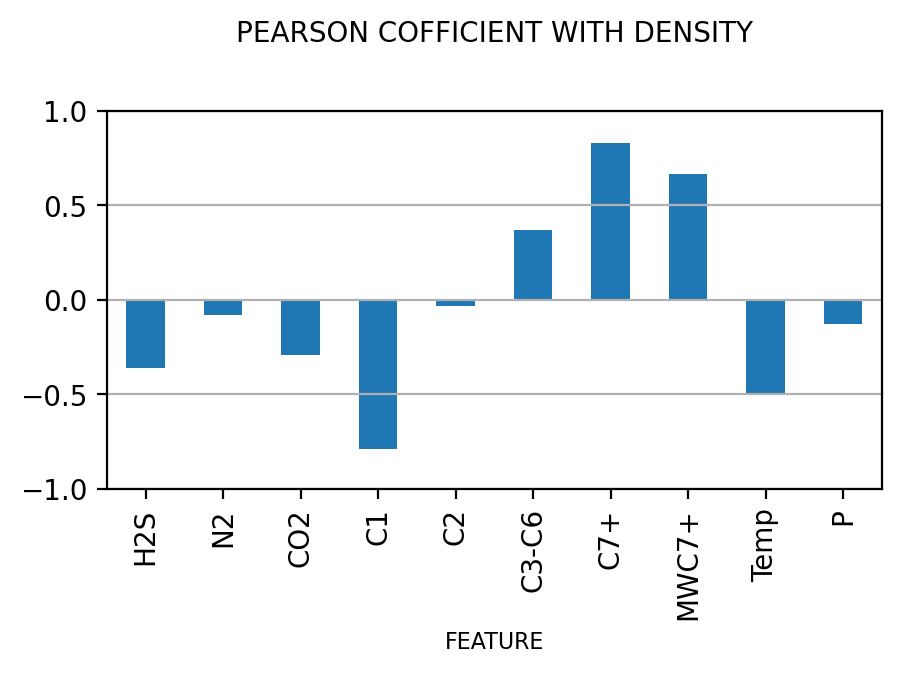

In [43]:
fig4 = plt.figure(figsize = (5,2.5) , dpi = 200)
new_raw_data.corr()["Density"].drop("Density").plot(kind = "bar")
plt.title("PEARSON COFFICIENT WITH DENSITY" , fontsize =10, pad = 25)
plt.xlabel("FEATURE" , fontsize = 8)
plt.ylim((-1,1))
plt.grid(axis = "y")


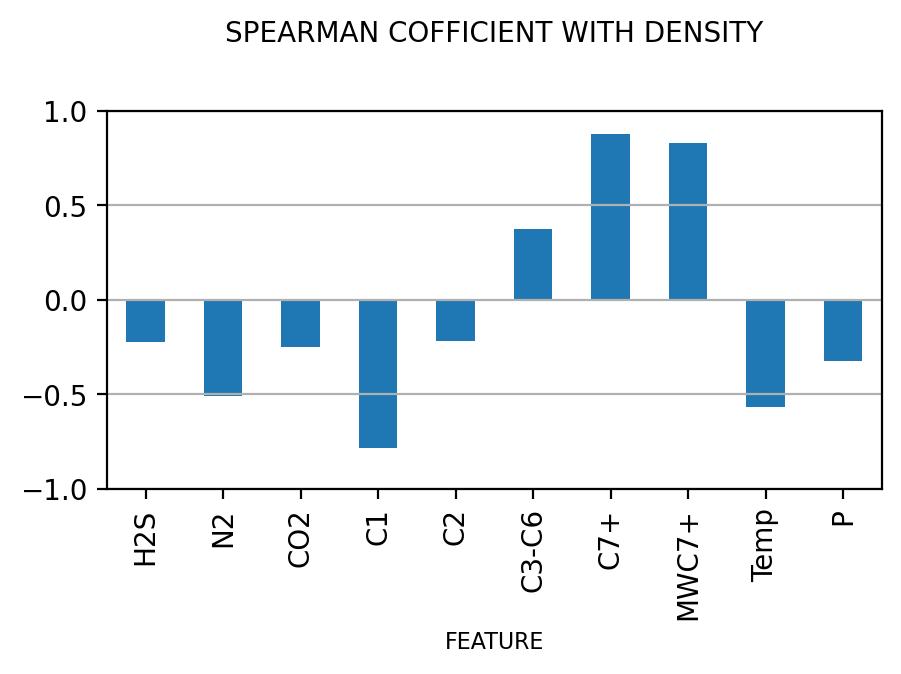

In [44]:
fig5 = plt.figure(figsize = (5,2.5) , dpi = 200)
new_raw_data.corr("spearman")["Density"].drop("Density").plot(kind = "bar")
plt.title("SPEARMAN COFFICIENT WITH DENSITY" , fontsize =10, pad = 25)
plt.xlabel("FEATURE" , fontsize = 8)
plt.ylim((-1,1))
plt.grid(axis = "y")

                          #### HISTOGRAM OF DATA ####

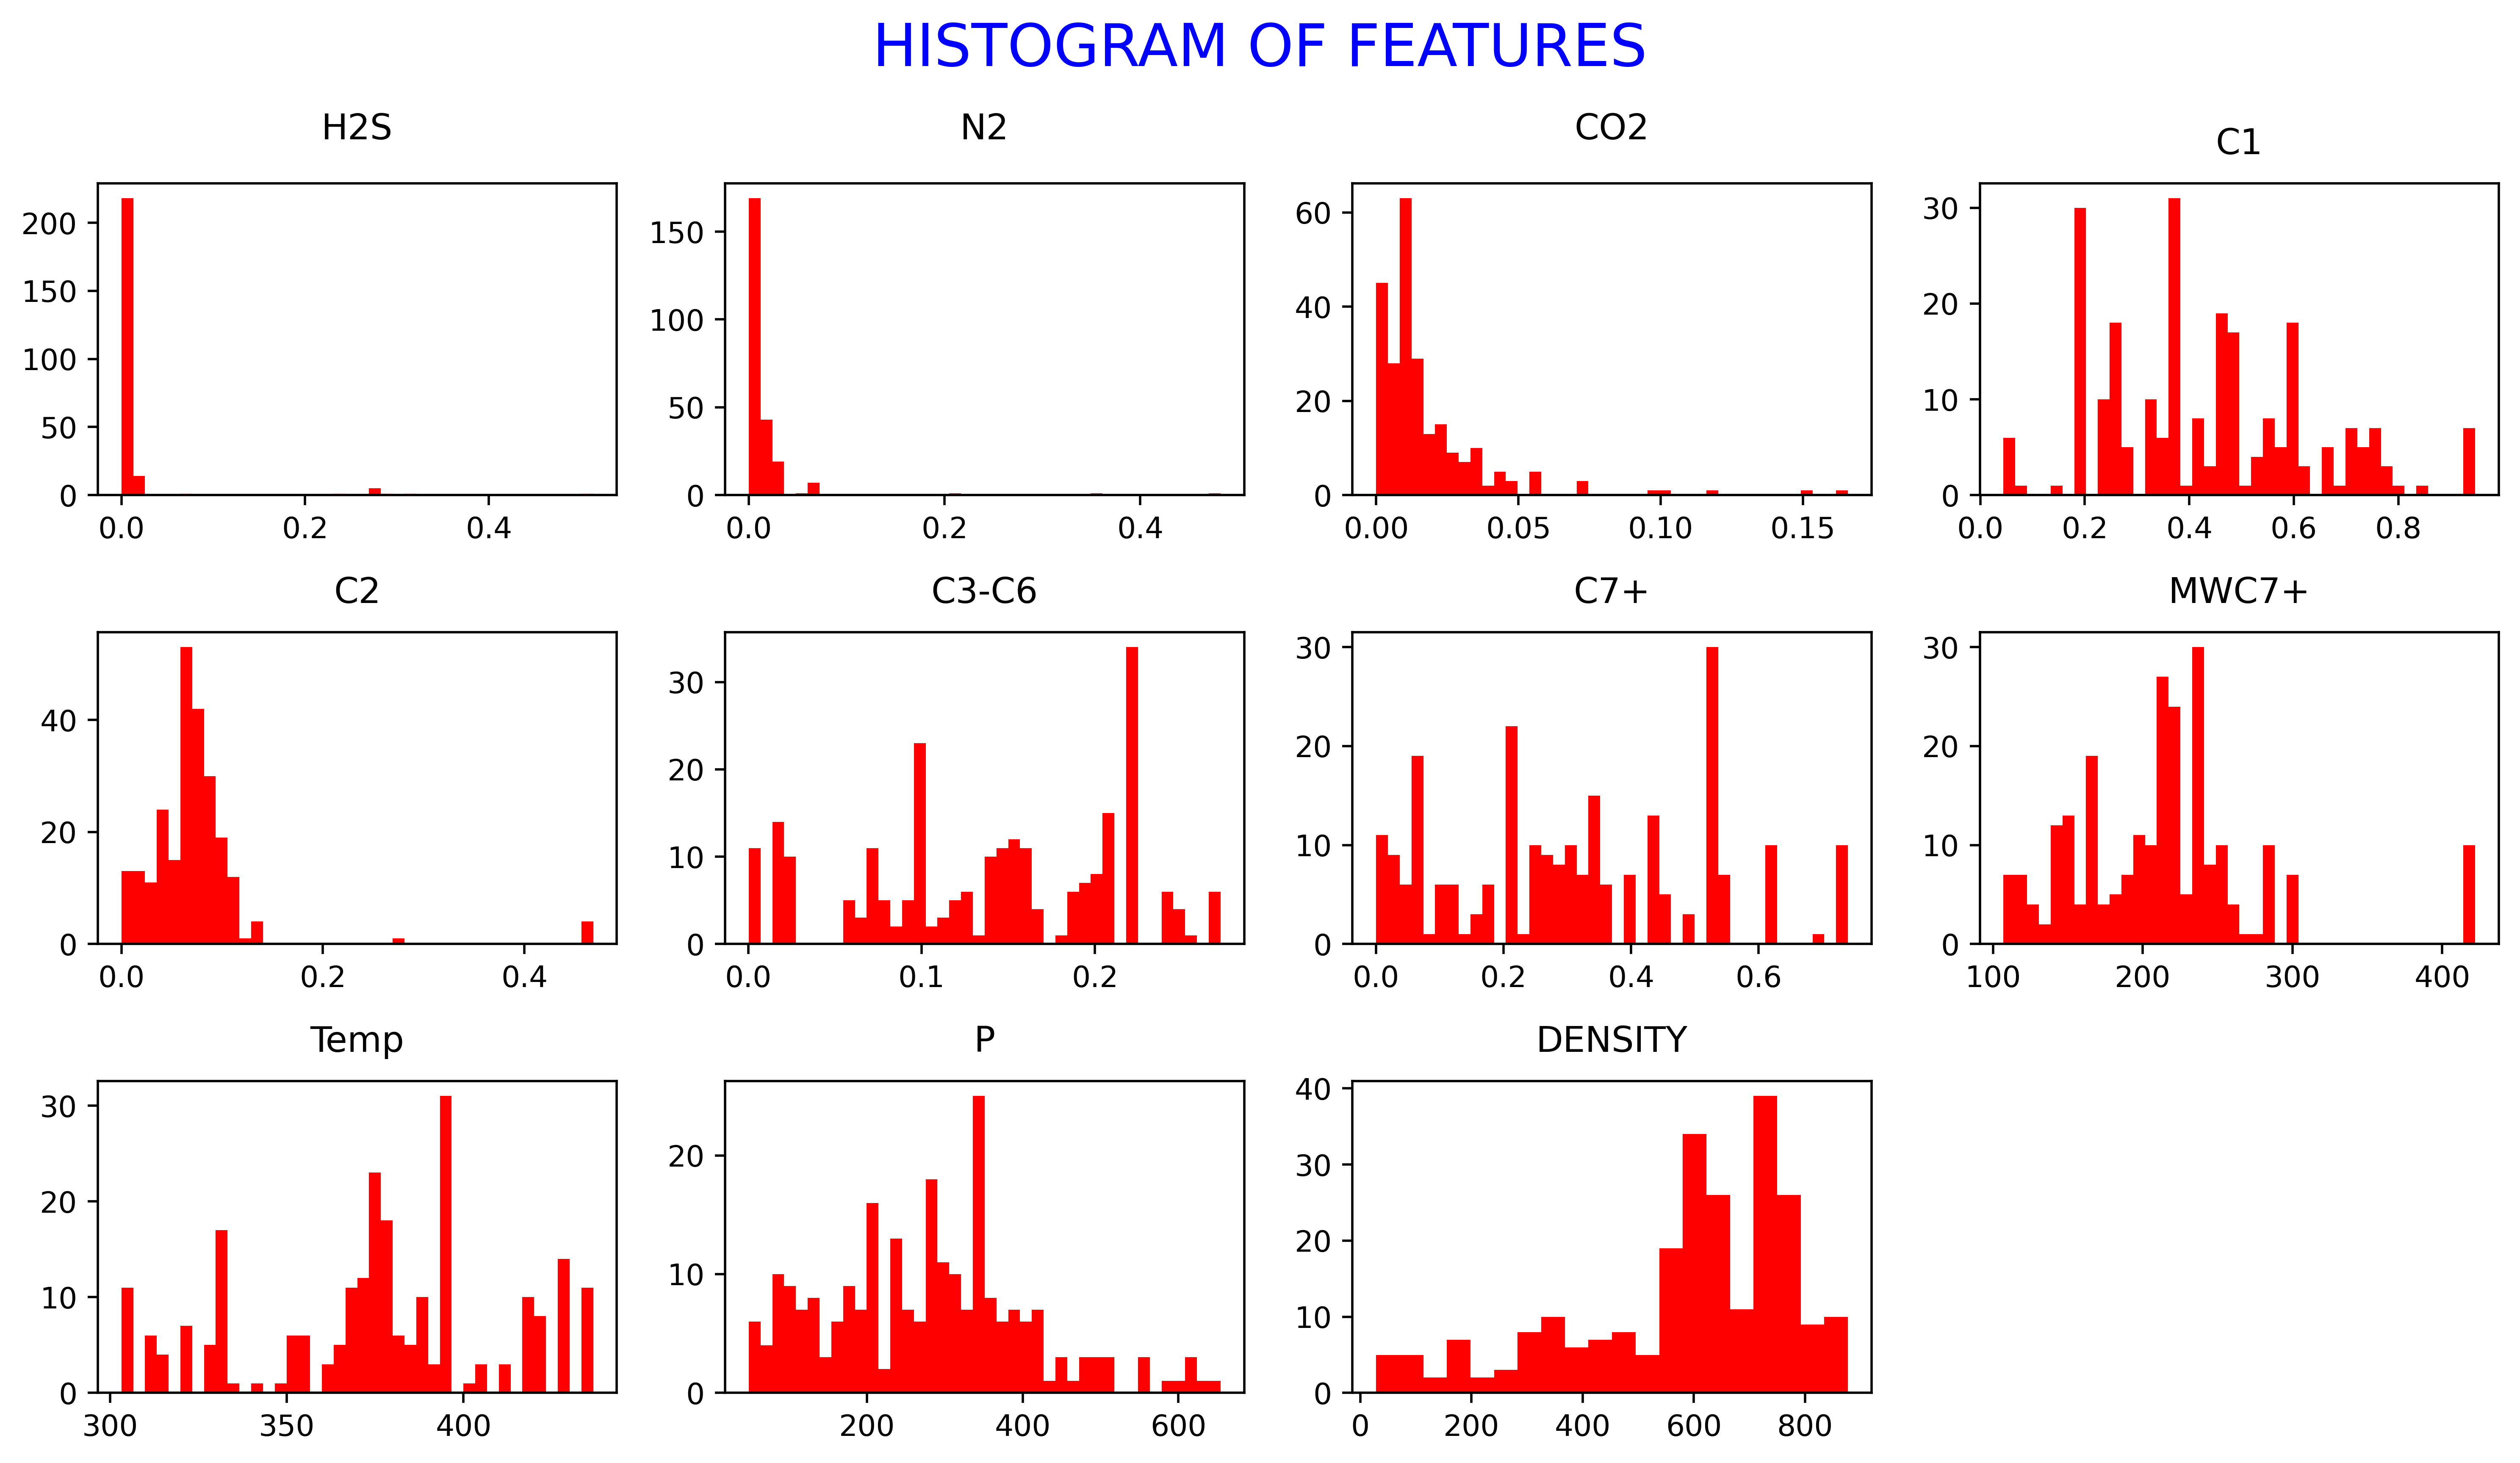

In [46]:
plt.figure(figsize=(12,7) , dpi =500)
plt.suptitle("HISTOGRAM OF FEATURES" , fontsize = 20 , c = "blue")

plt.subplot(3,4,1)
plt.hist(new_raw_data["H2S"], color ="red", bins = 40)
plt.title("H2S" , pad = 15)

plt.subplot(3,4,2)
plt.hist(new_raw_data["N2"], color ="red", bins = 40)
plt.title("N2" , pad = 15)


plt.subplot(3,4,3)
plt.hist(new_raw_data["CO2"], color ="red", bins = 40)
plt.title("CO2" , pad = 15)


plt.subplot(3,4,4)
plt.hist(new_raw_data["C1"], color ="red", bins = 40)
plt.title("C1" , pad = 10)



plt.subplot(3,4,5)
plt.hist(new_raw_data["C2"], color ="red", bins = 40)
plt.title("C2" , pad = 10)



plt.subplot(3,4,6)
plt.hist(new_raw_data["C3-C6"], color ="red", bins = 40)
plt.title("C3-C6" , pad = 10)



plt.subplot(3,4,7)
plt.hist(new_raw_data["C7+"], color ="red", bins = 40)
plt.title("C7+" , pad = 10)



plt.subplot(3,4,8)
plt.hist(new_raw_data["MWC7+"], color ="red", bins = 40)
plt.title("MWC7+" , pad = 10)


plt.subplot(3,4,9)
plt.hist(new_raw_data["Temp"], color ="red", bins = 40)
plt.title("Temp" , pad = 10)



plt.subplot(3,4,10)
plt.hist(new_raw_data["P"], color ="red", bins = 40)
plt.title("P" , pad = 10)


plt.subplot(3,4,11)
plt.hist(new_raw_data["Density"], color ="red", bins = 20)
plt.title("DENSITY" , pad = 10)



plt.tight_layout()


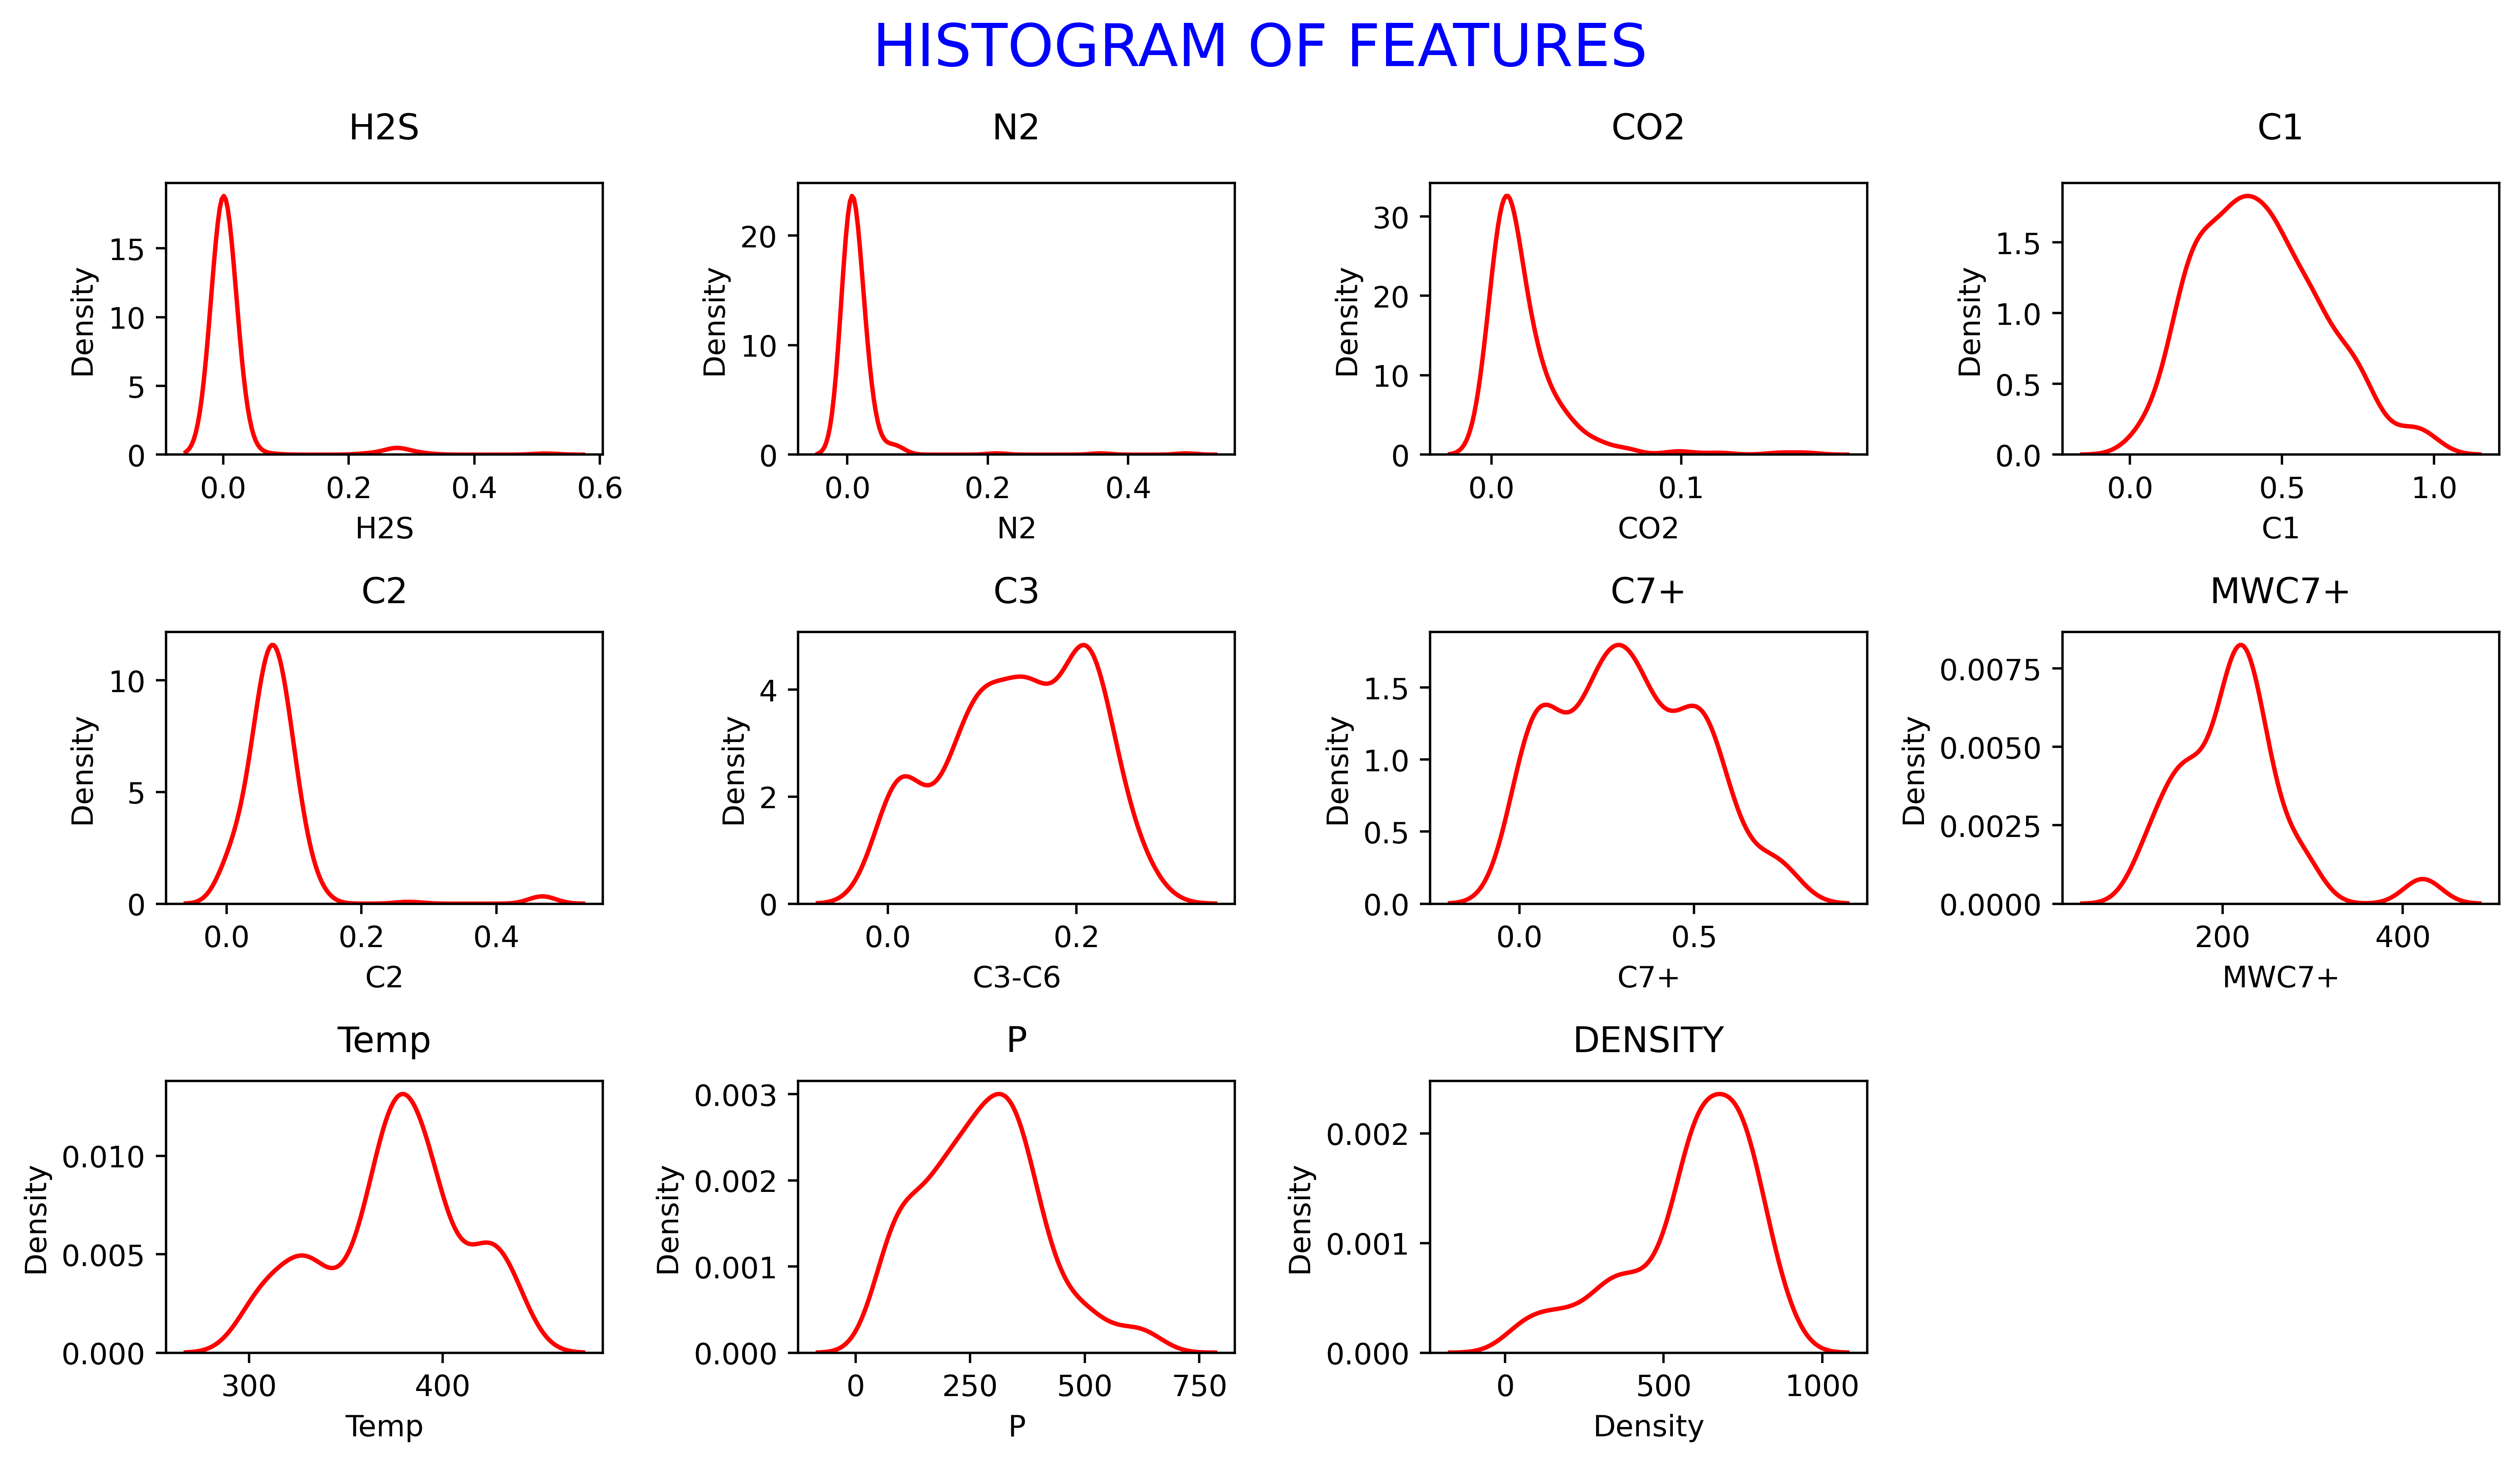

In [47]:
plt.figure(figsize=(12,7) , dpi =500)
plt.suptitle("HISTOGRAM OF FEATURES" , fontsize = 20 , c = "blue")

plt.subplot(3,4,1)
sns.kdeplot(new_raw_data["H2S"], color ="red")
plt.title("H2S" , pad = 15)


plt.subplot(3,4,2)
sns.kdeplot(new_raw_data["N2"], color ="red")
plt.title("N2" , pad = 15)

plt.subplot(3,4,3)
sns.kdeplot(new_raw_data["CO2"], color ="red")
plt.title("CO2" , pad = 15)


plt.subplot(3,4,4)
sns.kdeplot(new_raw_data["C1"], color ="red")
plt.title("C1" , pad = 15)


plt.subplot(3,4,5)
sns.kdeplot(new_raw_data["C2"], color ="red")
plt.title("C2" , pad = 10)



plt.subplot(3,4,6)
sns.kdeplot(new_raw_data["C3-C6"], color ="red")
plt.title("C3" , pad = 10)




plt.subplot(3,4,7)
sns.kdeplot(new_raw_data["C7+"], color ="red")
plt.title("C7+" , pad = 10)



plt.subplot(3,4,8)
sns.kdeplot(new_raw_data["MWC7+"], color ="red")
plt.title("MWC7+" , pad = 10)


plt.subplot(3,4,9)
sns.kdeplot(new_raw_data["Temp"], color ="red")
plt.title("Temp" , pad = 10)

plt.subplot(3,4,10)
sns.kdeplot(new_raw_data["P"], color ="red")
plt.title("P" , pad = 10)

plt.subplot(3,4,11)
sns.kdeplot(new_raw_data["Density"], color ="red")
plt.title("DENSITY" , pad = 10)

plt.tight_layout()


In [48]:
##Not Removing Outliers Present inside Dataset to check effect
#Use if it required
def outlier_removal(data):
        def outlier_limits(col):
            Q3, Q1 = col.quantile([0.75,0.25])
            IQR= Q3-Q1
            UL= Q3+1.5*IQR
            LL= Q1-1.5*IQR
            return UL, LL

        for column in data.columns:
            if data[column].dtype == 'float64':
                UL, LL= outlier_limits(data[column])
                data[column]= np.where((data[column] > UL) | (data[column] < LL),np.nan, data[column])

        return data

In [49]:
final_dataset = new_raw_data.copy()

In [50]:
final_dataset.shape

(242, 11)

                             #### Scatter Plot of Features vs label ####

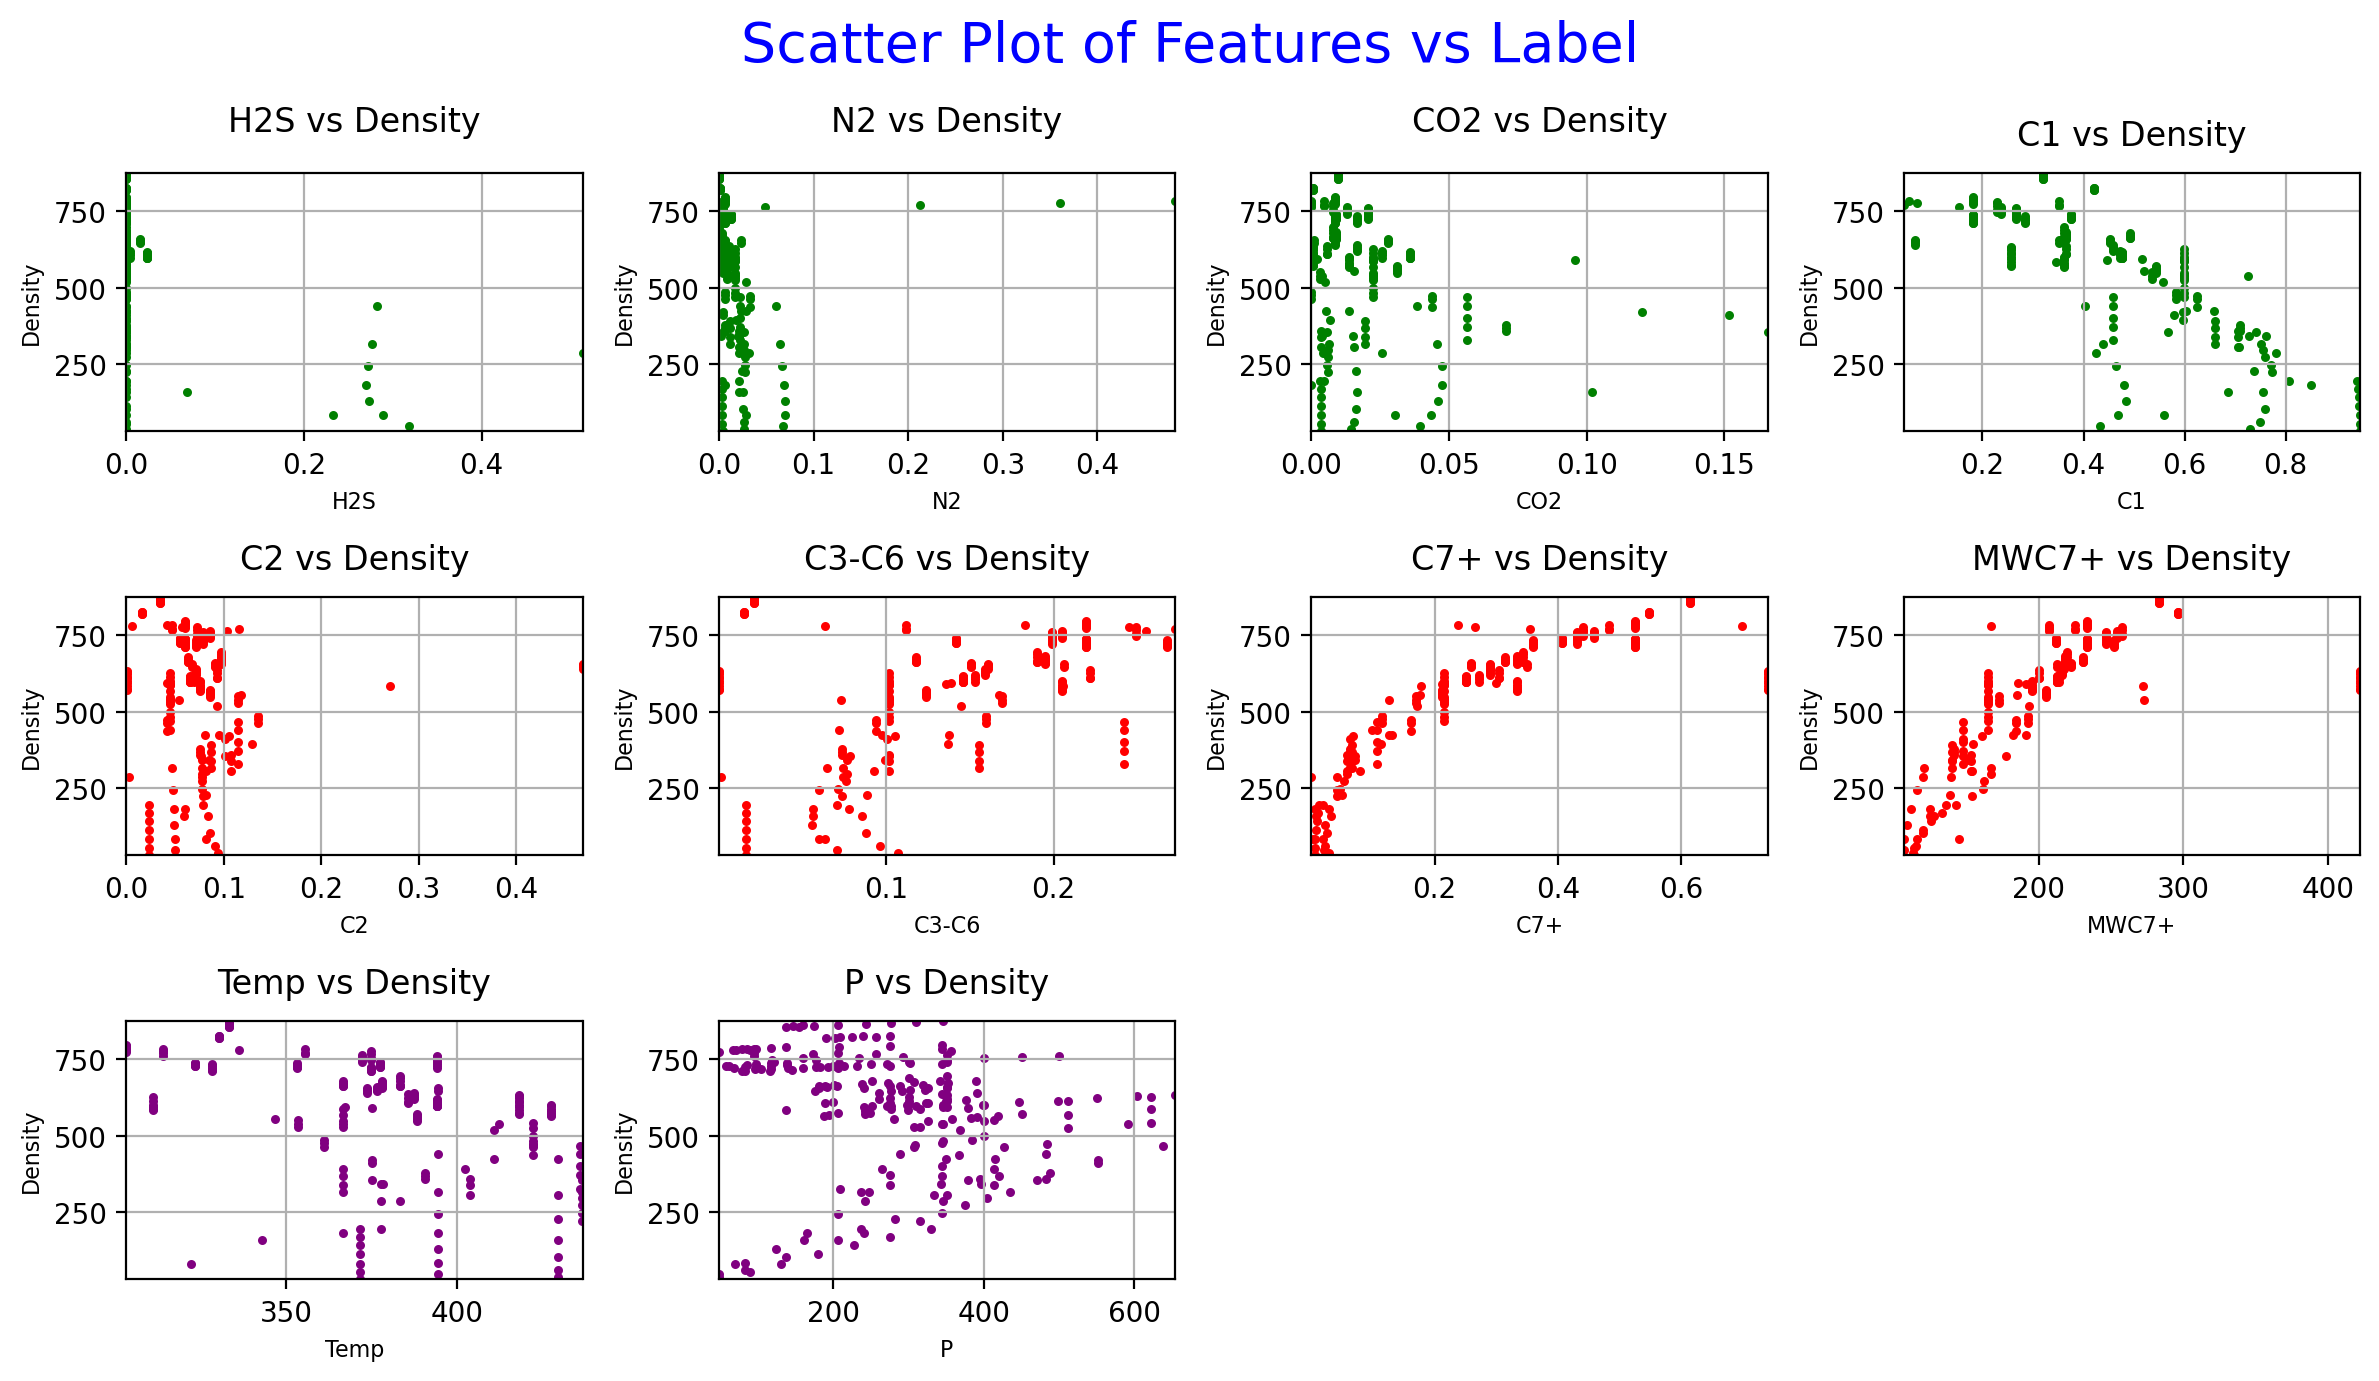

In [51]:
plt.figure(figsize=(12,7) , dpi = 200)
plt.suptitle("Scatter Plot of Features vs Label" , fontsize = 20 , c = "blue")

plt.subplot(3,4,1)
plt.scatter(final_dataset["H2S"],final_dataset["Density"],c = "green",s = 5 )
plt.xlim((min(final_dataset["H2S"] ), max(final_dataset["H2S"])))
plt.ylim((min(final_dataset["Density"] ), max(final_dataset["Density"])))
plt.grid()
plt.title("H2S vs Density" , pad = 15)
plt.xlabel("H2S", fontsize = 8)
plt.ylabel("Density",fontsize = 8)

plt.subplot(3,4,2)
plt.scatter(final_dataset["N2"],final_dataset["Density"],c = "green",s = 5)
plt.xlim((min(final_dataset["N2"] ), max(final_dataset["N2"])))
plt.ylim((min(final_dataset["Density"] ), max(final_dataset["Density"])))
plt.grid()
plt.title("N2 vs Density" , pad = 15)
plt.xlabel("N2", fontsize = 8)
plt.ylabel("Density",fontsize = 8)


plt.subplot(3,4,3)
plt.scatter(final_dataset["CO2"],final_dataset["Density"],c = "green",s = 5)
plt.xlim((min(final_dataset["CO2"] ), max(final_dataset["CO2"])))
plt.ylim((min(final_dataset["Density"] ), max(final_dataset["Density"])))
plt.grid()
plt.title("CO2 vs Density" , pad = 15)
plt.xlabel("CO2", fontsize = 8)
plt.ylabel("Density",fontsize = 8)


plt.subplot(3,4,4)
plt.scatter(final_dataset["C1"],final_dataset["Density"],c = "green",s = 5)
plt.xlim((min(final_dataset["C1"] ), max(final_dataset["C1"])))
plt.ylim((min(final_dataset["Density"] ), max(final_dataset["Density"])))
plt.grid()
plt.title("C1 vs Density" , pad = 10)
plt.xlabel("C1", fontsize = 8)
plt.ylabel("Density",fontsize = 8)


plt.subplot(3,4,5)
plt.scatter(final_dataset["C2"],final_dataset["Density"],c = "red",s = 5)
plt.xlim((min(final_dataset["C2"] ), max(final_dataset["C2"])))
plt.ylim((min(final_dataset["Density"] ), max(final_dataset["Density"])))
plt.grid()
plt.title("C2 vs Density" , pad = 10)
plt.xlabel("C2", fontsize = 8)
plt.ylabel("Density",fontsize = 8)


plt.subplot(3,4,6)
plt.scatter(final_dataset["C3-C6"],final_dataset["Density"],c = "red",s = 5)
plt.xlim((min(final_dataset["C3-C6"] ), max(final_dataset["C3-C6"])))
plt.ylim((min(final_dataset["Density"] ), max(final_dataset["Density"])))
plt.grid()
plt.title("C3-C6 vs Density" , pad = 10)
plt.xlabel("C3-C6", fontsize = 8)
plt.ylabel("Density",fontsize = 8)


plt.subplot(3,4,7)
plt.scatter(final_dataset["C7+"],final_dataset["Density"],c = "red",s = 5)
plt.xlim((min(final_dataset["C7+"] ), max(final_dataset["C7+"])))
plt.ylim((min(final_dataset["Density"] ), max(final_dataset["Density"])))
plt.grid()
plt.title("C7+ vs Density" , pad = 10)
plt.xlabel("C7+", fontsize = 8)
plt.ylabel("Density",fontsize = 8)


plt.subplot(3,4,8)
plt.scatter(final_dataset["MWC7+"],final_dataset["Density"],c = "red",s = 5)
plt.xlim((min(final_dataset["MWC7+"] ), max(final_dataset["MWC7+"])))
plt.ylim((min(final_dataset["Density"] ), max(final_dataset["Density"])))
plt.grid()
plt.title("MWC7+ vs Density" , pad = 10)
plt.xlabel("MWC7+", fontsize = 8)
plt.ylabel("Density",fontsize = 8)


plt.subplot(3,4,9)
plt.scatter(final_dataset["Temp"],final_dataset["Density"],c = "purple",s = 5)
plt.xlim((min(final_dataset["Temp"] ), max(final_dataset["Temp"])))
plt.ylim((min(final_dataset["Density"] ), max(final_dataset["Density"])))
plt.grid()
plt.title("Temp vs Density" , pad = 10)
plt.xlabel("Temp", fontsize = 8)
plt.ylabel("Density",fontsize = 8)


plt.subplot(3,4,10)
plt.scatter(final_dataset["P"],final_dataset["Density"],c = "purple",s = 5)
plt.xlim((min(final_dataset["P"] ), max(final_dataset["P"])))
plt.ylim((min(final_dataset["Density"] ), max(final_dataset["Density"])))
plt.grid()
plt.title("P vs Density" , pad = 10)
plt.xlabel("P", fontsize = 8)
plt.ylabel("Density",fontsize = 8)





plt.tight_layout()


In [52]:
finalized = final_dataset.copy()

In [53]:
df.iloc[finalized.index].to_excel(export_data_path+"FINALDATA.xlsx")

## 4. Selecting Features and Labels

                       #### Splitting Data For Train and Test ####

In [54]:
train , test  = train_test_split(finalized , test_size = 0.30 , random_state = 60)

In [55]:
train

,H2S,N2,CO2,C1,C2,C3-C6,C7+,MWC7+,Temp,P,Density
194,0.0000,0.0002,0.0096,0.32030,0.034900,0.021200,0.61390,283.486905,333.15,174.402268,860.211955
209,0.0000,0.0045,0.0164,0.45850,0.071500,0.158900,0.29020,216.182551,387.35,391.000000,640.205000
180,0.0000,0.0103,0.0138,0.36170,0.075732,0.204968,0.33350,195.711574,427.60,207.032332,574.277455
105,0.0232,0.0025,0.0360,0.47640,0.065000,0.145800,0.25120,212.700000,394.00,277.441494,596.103892
46,0.0000,0.0268,0.0063,0.75210,0.077400,0.074500,0.06290,166.900000,436.70,434.500000,314.800000
...,...,...,...,...,...,...,...,...,...,...,...
154,0.0000,0.0065,0.0086,0.18062,0.059914,0.219106,0.52525,233.365889,374.80,117.124197,718.276559
149,0.0000,0.0065,0.0086,0.18062,0.059914,0.219106,0.52525,233.365889,353.20,207.712432,738.717436
70,0.0000,0.0069,0.0000,0.58320,0.135500,0.159500,0.11450,193.000000,361.10,306.900000,462.100000
65,0.0000,0.0121,0.0194,0.65990,0.086900,0.155800,0.06590,140.000000,366.70,344.800000,369.000000


In [56]:
test

,H2S,N2,CO2,C1,C2,C3-C6,C7+,MWC7+,Temp,P,Density
143,0.0,0.0065,0.0086,0.18062,0.059914,0.219106,0.52525,233.365889,323.20,138.627451,737.515028
79,0.0,0.0226,0.0567,0.45740,0.114700,0.242000,0.10660,148.000000,436.10,344.800000,401.800000
56,0.0,0.0253,0.0166,0.75590,0.083900,0.086000,0.03230,128.000000,429.40,206.900000,157.500000
208,0.0,0.0020,0.0130,0.23600,0.086000,0.205000,0.45800,254.072354,372.05,121.700000,742.390000
23,0.0,0.0090,0.0030,0.53470,0.114600,0.169500,0.16920,173.000000,353.30,307.600000,528.800000
...,...,...,...,...,...,...,...,...,...,...,...
159,0.0,0.0007,0.0006,0.42060,0.015510,0.015600,0.54700,296.569594,330.40,209.502241,823.444968
3,0.0,0.0044,0.0045,0.35050,0.046400,0.111800,0.48240,225.000000,355.60,206.900000,772.000000
195,0.0,0.0002,0.0096,0.32030,0.034900,0.021200,0.61390,283.486905,333.15,206.469778,862.909455
62,0.0,0.0046,0.1518,0.57940,0.101100,0.100700,0.06240,148.000000,375.00,551.700000,411.200000


In [57]:
train_file_name = "TRAIN.csv"
test_file_name = "TEST.csv"
train.to_csv(path+train_file_name , header=True,index=False ,float_format="%.6f")
test.to_csv(path+test_file_name , header=True, index=False,float_format="%.6f")

.......................................THE END........................................................